<a href="https://colab.research.google.com/github/FKoeppe/sdsphd20_portfolio_fk/blob/main/Frederik_Koeppe_Homework_Tuesday2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio assignments for Tuesday (unsupervised and supervised machine learning)

**Requirement**: Work on solutions for *either* "unsupervised machine learning with penguins" or "clustering" *and* *either* "supervised machine learning with penguins" or "employee turnover".

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...

Pick some varibles you think is interesting and play with creating clusters. Can we explain what is going on?

In [ ]:
# Your solutions from here...

In [ ]:
# standard packaging

import pandas as pd
import seaborn as sns
sns.set(color_codes=True, rc={'figure.figsize':(10,8)})

from IPython.display import HTML #Youtube embed

In [ ]:
# load the dataset from GitHub - original source

penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")

In [ ]:
# You solutions from here...

## Employee turnover

### The assignment

In the repo, you will find a dataset describing employee turnover in a company.

https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv

The dataset contains data collected in an employee survey and enriched with HR data.

The variable `churn` tells us if the employee left the company in the past 3 months. The other variables are collected

#### Classification

Try to predict `churn` using a classification pipeline (perhaps add some simple exploration of the data first)

#### Regression
Try to predict the number of weekly average hours worked.

**Before** working with the data, you should use `pd.get_dummies` to get dummies for categorical variables.

In [ ]:
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np


sns.set(rc={'figure.figsize':(10,10)})

In [ ]:
# Load data
data = pd.read_csv('https://raw.githubusercontent.com/CALDISS-AAU/sdsphd20/master/datasets/turnover.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Around 23 % of all employees have quit in the time frame.

Column department and Salary are categorial variables -> need to be changed into integers.

In [ ]:
 data_dummied = pd.get_dummies(data) 

In [ ]:
data_dummied.columns

Index(['satisfaction', 'evaluation', 'number_of_projects',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'churn',
       'promotion', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
data_dummied.groupby(["churn"]).mean()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
churn,,,,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021,0.101068,0.450123,0.448810
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183,0.022963,0.608233,0.368804


With the groupby churn we can see that it seems that especially low salary worker, people not got a promotion, with slightly higher average monthly hours and less satisfaction are more likely to quit.

In [ ]:
# Select the (independant) features that we are going to use to train the model
X = data_dummied.iloc[:, np.r_[0:6, 7:21]]

In [ ]:
X

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Define the dependant variabel / target to predict (churn)
y = data_dummied.churn

Import stuff

In [ ]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# Transform labels into indices by passing y to the encoder
y_enc = encoder.fit_transform(y)

In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data using the train_test_split module. We keep 20% of the data for testing and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

Training and evaluating various models

In [ ]:
# Import modules that we are going to use for all models

# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluatoion of performance
from sklearn.metrics import classification_report

In [ ]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=2000)

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.78583333 0.7925     0.78833333 0.79916667 0.78032514]


In [ ]:
# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

0.7843333333333333


Overall performance is 78%

In [ ]:
target_names =[]

In [ ]:
# Performance evaluation using the classification_report

target_names = ['does not churn', 'does churn']

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred,  target_names = target_names)) #Print out the report

                precision    recall  f1-score   support

does not churn       0.82      0.92      0.87      2294
    does churn       0.57      0.34      0.42       706

      accuracy                           0.78      3000
     macro avg       0.69      0.63      0.65      3000
  weighted avg       0.76      0.78      0.76      3000



In [ ]:
!pip uninstall -qq mlxtend -y

In [ ]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.4MB 5.0MB/s 


In [ ]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8a0fe71550>)

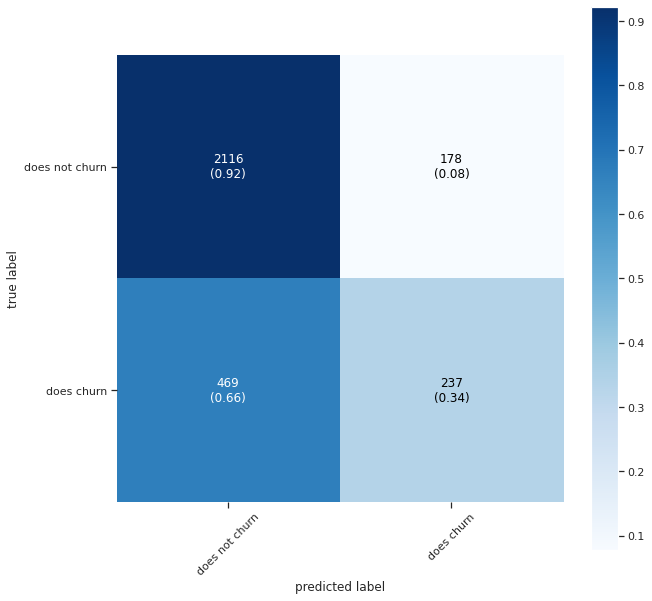

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                hide_spines = True,
                                class_names=target_names)

Logistic Regression predicted 92% of those who do not quit as "do not quit", which is a good value, however, only 34% of those who did quit have been correctly predicted as "do quit". For an HR Department i would guess this classification algorithm performance would not be good enough.

Trying Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

[0.98833333 0.98833333 0.98708333 0.99       0.98957899]


In [ ]:
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.9883333333333333


In [ ]:
# Performance evaluation using the classification_report

target_names = ['does not churn', 'does churn']

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred, target_names=target_names)) #Print out the report

                precision    recall  f1-score   support

does not churn       0.99      1.00      0.99      2294
    does churn       0.99      0.96      0.97       706

      accuracy                           0.99      3000
     macro avg       0.99      0.98      0.98      3000
  weighted avg       0.99      0.99      0.99      3000



(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8a0dd39f60>)

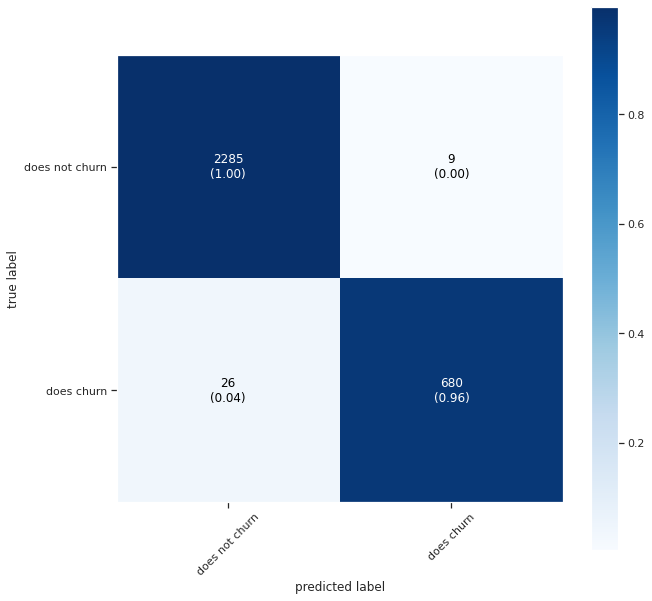

In [ ]:
# calculate the confusion matrix
confmatrix = confusion_matrix(y_test,y_pred) 

# Let's plot
plot_confusion_matrix(conf_mat=confmatrix,
                                colorbar=True,
                                show_absolute=True,
                                show_normed=True,
                                class_names = target_names)

Random Forest nearly predictes perfectly, only 4% of those who quit are predicted wrong.

Predicting Worked hours:

In [ ]:
# picking a different outcome variable

y_worked = data.average_montly_hours

In [ ]:
y_worked

0        157
1        262
2        272
3        223
4        159
        ... 
14994    151
14995    160
14996    143
14997    280
14998    158
Name: average_montly_hours, Length: 14999, dtype: int64

In [ ]:
X = data_dummied.iloc[:, np.r_[0:3, 4:21]]

In [ ]:
X

,satisfaction,evaluation,number_of_projects,time_spend_company,work_accident,churn,promotion,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
# Load and instantiate a StandardSclaer 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Apply the scaler to our X-features
X_scaled = scaler.fit_transform(X)

In [ ]:
# We need to create new train / test splits here

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, data_train, data_test = train_test_split(X_scaled, y_worked, data_dummied, test_size = 0.2, random_state = 42)

In [ ]:
# Import and instantiate the baseline model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

0.20621948874005744


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


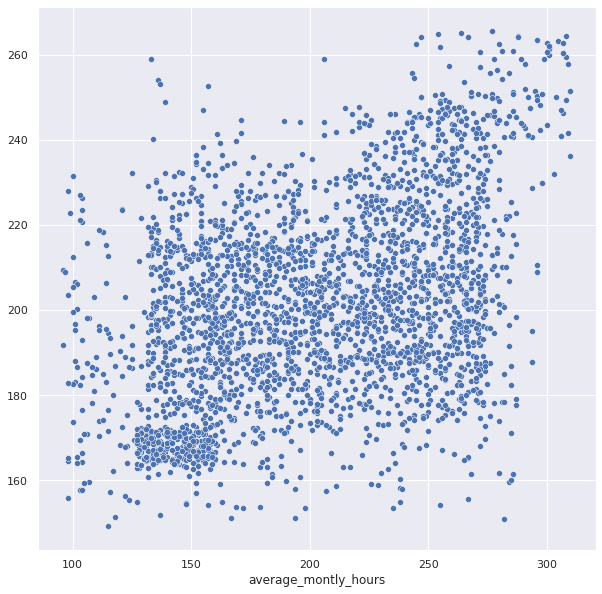

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 6723 to 14346
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction            3000 non-null   float64
 1   evaluation              3000 non-null   float64
 2   number_of_projects      3000 non-null   int64  
 3   average_montly_hours    3000 non-null   int64  
 4   time_spend_company      3000 non-null   int64  
 5   work_accident           3000 non-null   int64  
 6   churn                   3000 non-null   int64  
 7   promotion               3000 non-null   int64  
 8   department_IT           3000 non-null   uint8  
 9   department_RandD        3000 non-null   uint8  
 10  department_accounting   3000 non-null   uint8  
 11  department_hr           3000 non-null   uint8  
 12  department_management   3000 non-null   uint8  
 13  department_marketing    3000 non-null   uint8  
 14  department_product_mng  3000 non-nul

In [ ]:
data_test['Average prediction'] = y_pred

alt.Chart(data_test).mark_circle(size=5).encode(
    alt.X('average_montly_hours',scale=alt.Scale(domain=(100, 300))),
    alt.Y('Average prediction',scale=alt.Scale(domain=(150, 300))),
    color=alt.Color('satisfaction', scale=alt.Scale(scheme='redblue')),
    tooltip=['satisfaction']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)

This graph maybe shows that linear regression might not be the best model for prediction working hours. The example of satisfaction shows a non linear relationship, since very unsatisfied employees are either working very much (overworked) or only the bare minimum (non-motivation). This variable then is not useful to include in such a model.

XGB Regressor perform better : 32%

In [ ]:
# Import and instantiate a XGBoost Regressor
import xgboost as xgb
model = xgb.XGBRegressor()

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set / This score is not accacy but a R^2
print(model.score(X_test, y_test))

[16:37:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3250350119975146


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


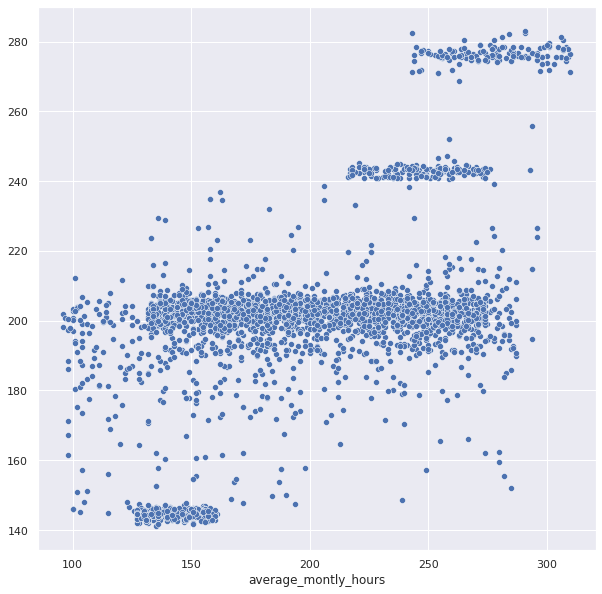

In [ ]:
# We can also inspect our results visually
y_pred = model.predict(X_test)

sns.scatterplot(y_test,y_pred)

In [ ]:
data_test['Average prediction'] = y_pred

alt.Chart(data_test).mark_circle(size=5).encode(
    alt.X('average_montly_hours',scale=alt.Scale(domain=(100, 300))),
    alt.Y('Average prediction',scale=alt.Scale(domain=(150, 300))),
    color=alt.Color('satisfaction', scale=alt.Scale(scheme='redblue')),
    tooltip=['satisfaction']
).interactive()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


alt.Chart(...)